# Week11-Yunshuo Zhang
### SID: 500025673
### Author: Yunshuo Zhang
#### Start date: 16/10/2022    End date: 16/10/2022

## 1. Introduction


**Data Collection:** Most of these were created by the QS Access app for IoS to access step data from Apple Health. Ones ending in "detail" were accessed directly from Apple Health and processed with a python script to convert the xml to csv.

**Data Ownership:** Apple Health

**Potential Conflicts of interest:**

**Anonymisation** The data only includes the step data from the start of this year. We have already got the informed consent of the participants and the datasets are named as participant ID. Hence, we did this analysis without knowing the age, gender, ethnicity, favourite breakfast food or anything else which ensured anonymisation and reduced the risk of re-identification of data with the people

**Data Management:** We manage data by distinguishing between different data sets. Data cleaning is mainly performed for each dataset. In addition, under different sub problems, data processing and analysis are carried out with each data set as the sub title. Finally, combine the results of each data set to integrate comparative analysis.

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import plotly.io as pio

In [18]:
pio.renderers
pio.renderers.default = "svg"

Preliminary observation data，p3 means the data from participant_03, p1 means the data from participant_01

In [3]:
# Author: Yunshuo Zhang
#Beg
p3 = pd.read_csv("Participant-03.csv", sep=",")
p3

,Start,Finish,Steps (count)
0,31/12/2021 23:00,01/01/2022 0:00,0.000000
1,01/01/2022 0:00,01/01/2022 1:00,14.000000
2,01/01/2022 1:00,01/01/2022 2:00,0.000000
3,01/01/2022 2:00,01/01/2022 3:00,0.000000
4,01/01/2022 3:00,01/01/2022 4:00,0.000000
...,...,...,...
6015,08/09/2022 13:00,08/09/2022 14:00,0.000000
6016,08/09/2022 14:00,08/09/2022 15:00,893.959035
6017,08/09/2022 15:00,08/09/2022 16:00,534.040965
6018,08/09/2022 16:00,08/09/2022 17:00,390.020268


In [4]:
p3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6020 entries, 0 to 6019
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Start          6020 non-null   object 
 1   Finish         6020 non-null   object 
 2   Steps (count)  6020 non-null   float64
dtypes: float64(1), object(2)
memory usage: 141.2+ KB


In [5]:
p3.head(10)

,Start,Finish,Steps (count)
0,31/12/2021 23:00,01/01/2022 0:00,0.0
1,01/01/2022 0:00,01/01/2022 1:00,14.0
2,01/01/2022 1:00,01/01/2022 2:00,0.0
3,01/01/2022 2:00,01/01/2022 3:00,0.0
4,01/01/2022 3:00,01/01/2022 4:00,0.0
5,01/01/2022 4:00,01/01/2022 5:00,0.0
6,01/01/2022 5:00,01/01/2022 6:00,0.0
7,01/01/2022 6:00,01/01/2022 7:00,0.0
8,01/01/2022 7:00,01/01/2022 8:00,0.0
9,01/01/2022 8:00,01/01/2022 9:00,49.0


In [6]:
p3.tail(4)

,Start,Finish,Steps (count)
6016,08/09/2022 14:00,08/09/2022 15:00,893.959035
6017,08/09/2022 15:00,08/09/2022 16:00,534.040965
6018,08/09/2022 16:00,08/09/2022 17:00,390.020268
6019,08/09/2022 17:00,08/09/2022 18:00,1191.979732


In [7]:
p3['Finish']

0        01/01/2022 0:00
1        01/01/2022 1:00
2        01/01/2022 2:00
3        01/01/2022 3:00
4        01/01/2022 4:00
              ...       
6015    08/09/2022 14:00
6016    08/09/2022 15:00
6017    08/09/2022 16:00
6018    08/09/2022 17:00
6019    08/09/2022 18:00
Name: Finish, Length: 6020, dtype: object

According to the p3 dataset, it record the start time and finish time pf participants taking steps and the count of steps in each one hour period. The finish time range is between 01/01/2022 0:00 and 08/09/2022 18:00

## 2. Data Clean

Each step count is based on one hour period. The first period start at 31/12/2021 23:00 which only has one hour in Decmember of 2021, so we count it as January of 2022 by aggregate the month data based on the Finish time.

Firstly, extract the months from the Finish time and store it as a new column called "month"

In [8]:
p3['month'] = pd.to_datetime(p3['Finish'], dayfirst=True).dt.month 
p3['date'] = pd.to_datetime(p3['Finish'], dayfirst=True).dt.date
p3 = p3.drop('Start', axis=1)
p3 = p3.drop('Finish', axis=1)
print(p3.isnull().sum())

Steps (count)    0
month            0
date             0
dtype: int64


Based on the "date" we extracted, we aggregate the daiily step count by calculating the sum and follow with its month and form it as a new data frame called "cleaned_date". 

In [9]:
cleaned_date = p3.groupby('date').agg(total_steps_per_day=pd.NamedAgg(column="Steps (count)", aggfunc="sum"),
                                      month=pd.NamedAgg(column="month", aggfunc="max"))

cleaned_date = cleaned_date.drop(cleaned_date[cleaned_date.month == 9].index)
cleaned_date

,total_steps_per_day,month
date,,
2022-01-01,1614.0,1
2022-01-02,5822.0,1
2022-01-03,1959.0,1
2022-01-04,61.0,1
2022-01-05,215.0,1
...,...,...
2022-08-27,2295.0,8
2022-08-28,1118.0,8
2022-08-29,12679.0,8


This cleaned_date could be used to calculate the monthly steps and in the sub-question analyze.

## 3 Driving quesiton: What is the rate of days reaching the health standard every month？
### 3.1 Sub-Question: What is the proportion of days reaching the health standard every month？

#### 3.1.1 Dataset: Participant_03.csv

**Purpose:** To observe the trend of the monthly proportion of reaching the health standard, and judge whether the participant has a stable trend of steps

By calculating the proportion of the number of days reaching the health standard each month, observe the trend of the monthly proportion of reaching the health standard, and judge whether the participant has a stable trend of steps. At the same time, the monthly compliance is observed by calculating the average compliance proportion and comparing it with the total steps and health standard.

**Importance:** By observing the proportion of the number of days reaching the standard each month, it is more conducive to reflect the real health compliance of the participant each month. It is possible that the total number of steps in a month may reach the health standard due to the excessive number of steps in a few days, while the number of steps in most days does not reach the health standard. Hence, just looking at the total number of steps in a month does not represent the compliance of healthy steps of participants.

**Stakeholder:** The stakeholders in this research are the participants and the analysis team. 

1. For participants, the result of this reseach is benefit for them to know about the health compliance of themselves and they could improve their health compliance by following our suggestion

2. For analysis team, We can exchange research results and observe the general monthly steps of participants. The data cleaning, data sorting and data visualization methods used in the research can also be used in other related research.

Healthy steps reference link: https://ijbnpa.biomedcentral.com/articles/10.1186/1479-5868-8-79

According to the research, 10,000 steps/day is reasonable for audlt population and the estimates of habitual activity levels equate to 7,000 to 11,000 steps/day. We assume the participant 3 is a normal adult and Set the minimum number of healthy steps as 7000 steps per day, which is equivalent to 210000 steps per month. 

We want to explore the proportion of days that meet the health standard every month. By exploring the ratio, we can observe the proportion of healthy steps of participants in each month to help them further understand their own steps

Based on the cleaned_date, we aggregate the monthly step count by calculating the sum and calculate the healthy standard by multiplying the total days in a month and standard daily steps.

In [10]:
clean_month_steps = cleaned_date.groupby('month').agg(total_steps_per_month=pd.NamedAgg(column="total_steps_per_day", aggfunc="sum"))
clean_month_date = cleaned_date.groupby('month').count()
clean_healthy = clean_month_date * 7000

In [11]:
clean_p3 = pd.concat([clean_month_steps, clean_healthy], axis=1, join="inner")
clean_p3.columns.values[1] = "health_standard"
clean_p3.round(1)

,total_steps_per_month,health_standard
month,,
1,52121.0,217000
2,211422.0,196000
3,205875.0,217000
4,146538.0,210000
5,218108.0,217000
6,162690.0,210000
7,119113.0,217000
8,250056.0,217000


After rounding the data to one decimal place, the data is cleaner and more organized.

Import cufflinks and set the theme to 'pearl'

In [12]:
import pandas as pd
import cufflinks as cf
import numpy as np


In [13]:
cf.set_config_file(theme='pearl', sharing='public', offline=True)

In [14]:
cleaned_count = cleaned_date.groupby('month')['total_steps_per_day'].apply(lambda x: x[x >= 7000].count())
cleaned_count = pd.DataFrame(data = cleaned_count)
cleaned_count.columns.values[0] = "total_days_over_7000"
cleaned_count

,total_days_over_7000
month,
1,1
2,20
3,19
4,13
5,16
6,13
7,8
8,19


Calculate the the proportion by dividing the number of days over 7000 steps by the total number of days in a month and store it in the "proportion" dataframe

In [15]:
proportion = cleaned_count['total_days_over_7000'] / clean_month_date['total_steps_per_day']
proportion = pd.DataFrame(data = proportion)
proportion.columns = proportion.columns.astype(str)
proportion.columns.values[0] = "health_proportion(%)"
proportion

,health_proportion(%)
month,
1,0.032258
2,0.714286
3,0.612903
4,0.433333
5,0.516129
6,0.433333
7,0.258065
8,0.612903


Multiply the healthy proportion by 100 and round it to 2 decimals place.

In [16]:
proportion = proportion * 100
proportion.round(2)

,health_proportion(%)
month,
1,3.23
2,71.43
3,61.29
4,43.33
5,51.61
6,43.33
7,25.81
8,61.29


In [17]:
proportion['health_proportion(%)'].mean()

45.165130568356375

Below we created an interactive area chart covering the area under the health proportion of each month.

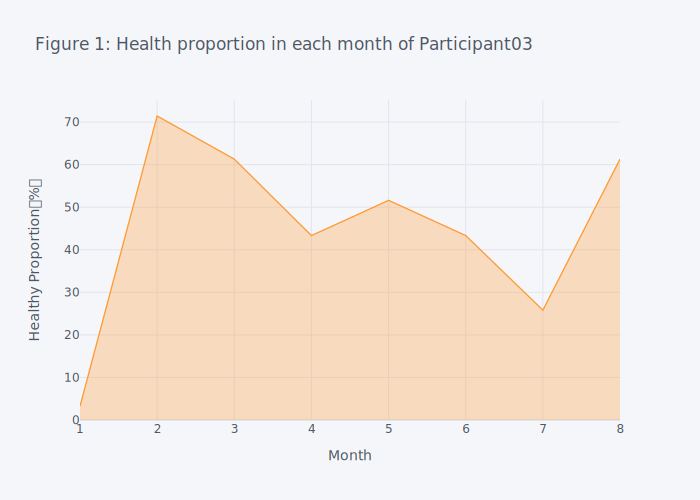

In [20]:
proportion.figure(y="health_proportion(%)",
               fill=True,
               xTitle="Month", yTitle="Healthy Proportion（%）", title="Figure 1: Health proportion in each month of Participant03"
               )


Figure 1 represents the the health
proportion in each month of participant 03, the x-axis is month and the y-axis is the proportion in percentage. It shows the trend of proportion change in each month.

Also, we created an interactive heat map to observe the proportion based on the intensity of the blue color.

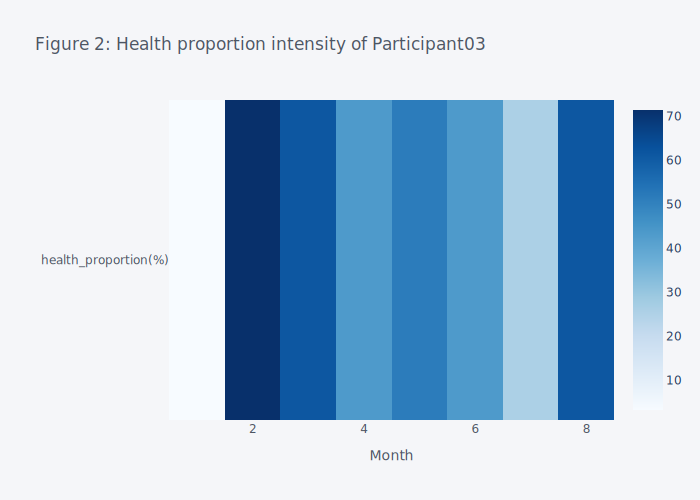

In [21]:
proportion.figure(kind="heatmap",
                   colorscale="Blues",xTitle="Month",title="Figure 2: Health proportion intensity of Participant03",
                   dimensions=(700,500))

Figure 2 represents the health proportion intensity of participant 03 where the x-axis represent months and the intensity of color represent the healthy proportion of each month. It uses the intensity of color to show the difference of the health proportion in each month.

Compare the monthly total steps with the health standard and generate spread chart to observe the total steps month to month trend

/Users/yunshuozhang/opt/anaconda3/lib/python3.9/site-packages/cufflinks/plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

/Users/yunshuozhang/opt/anaconda3/lib/python3.9/site-packages/cufflinks/plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



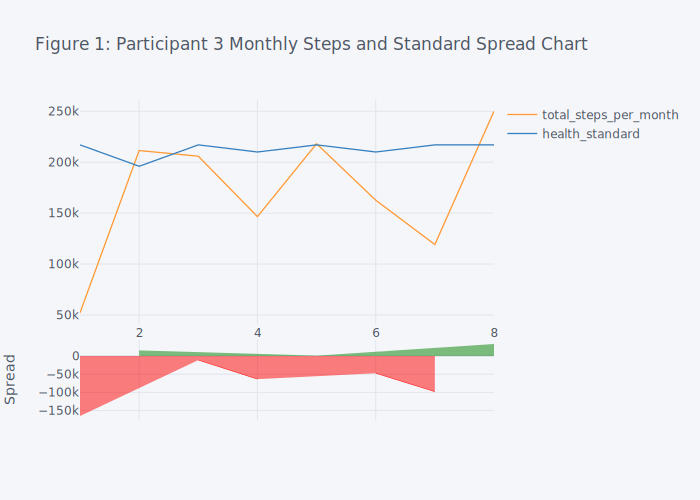

In [22]:
clean_p3.figure(kind="spread", keys=["total_steps_per_month", "health_standard"],
               title="Figure 1: Participant 3 Monthly Steps and Standard Spread Chart")

Figure 3 compare the real total steps in each month with the total steps of the health standard where the x-axis is month and y-axis is the number of steps. The orange line represent the total steps in each month and blue line represent the health standard. The spread chart shows the difference between two lines

According to the figure 1 and figure 2, the proportion of days reaching the health standard in January is the lowest which is only about 3%, and the color in the heat map is close to white which means lower than 10%. The percentage of healthy steps reaching the standard in February was the highest which is approximately 70%, and the color in the picture is also the darkest. March and August were also relatively high at about 60 percent. The average proportion is around 45%.

In addition, based on the figure 3, even though the total steps in May and August reach the health standard, only approximately 50%-60% of days in those month reach the daily standard. Furthermore, there is a large gap in January, April, June and July which are the months with small proportion of healthy days. 

In conclusion, the participant took in February, March and August, with a relatively large amount of steps, while the amount of exercise in January was the least. Moreover, the number of healthy days per month trend is fluctuated. We suggest that the participant should increase the exercise and steps in most months, and try to maintain a healthy standard every day instead of focusing on a few days



#### 3.1.2 Exchange Dataset: Participant_01

Duplicate process as before


In [23]:
p1 = pd.read_csv("Participant-01.csv", sep=",")
p1.describe()

,Steps (count)
count,5867.000000
mean,359.408456
std,747.642053
min,0.000000
25%,0.000000
50%,55.000000
75%,321.019800
max,6137.722328


In [24]:
p1.head()

,Start,Finish,Steps (count)
0,31-Dec-2021 23:00,01-Jan-2022 00:00,0.0
1,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
2,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
3,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
4,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0


In [25]:
p1.tail()

,Start,Finish,Steps (count)
5862,02-Sep-2022 04:00,02-Sep-2022 05:00,9.000000
5863,02-Sep-2022 05:00,02-Sep-2022 06:00,0.000000
5864,02-Sep-2022 06:00,02-Sep-2022 07:00,410.584935
5865,02-Sep-2022 07:00,02-Sep-2022 08:00,1153.415065
5866,02-Sep-2022 08:00,02-Sep-2022 09:00,1.000000


According to the p1 dataset, it record the start time and finish time pf participants taking steps and the count of steps in each one hour period. The finish time range is between 01/01/2022 0:00 and 02/09/2022 09:00



Check the null value

In [26]:
p1['month'] = pd.to_datetime(p1['Finish'], dayfirst=True).dt.month 
p1['date'] = pd.to_datetime(p1['Finish'], dayfirst=True).dt.date
p1 = p1.drop('Start', axis=1)
p1 = p1.drop('Finish', axis=1)
print(p1.isnull().sum())

Steps (count)    0
month            0
date             0
dtype: int64


Aggregate the total steps per day

In [27]:
cleaned_date_p1 = p1.groupby('date').agg(total_steps_per_day=pd.NamedAgg(column="Steps (count)", aggfunc="sum"),
                                      month=pd.NamedAgg(column="month", aggfunc="max"))

cleaned_date_p1 = cleaned_date_p1.drop(cleaned_date_p1[cleaned_date_p1.month == 9].index)
cleaned_date_p1

,total_steps_per_day,month
date,,
2022-01-01,11500.000000,1
2022-01-02,10446.000000,1
2022-01-03,6294.000000,1
2022-01-04,14411.000000,1
2022-01-05,11026.000000,1
...,...,...
2022-08-27,13906.000000,8
2022-08-28,11704.000000,8
2022-08-29,8283.918443,8


Aggregate the total steps per month and the healthy standard steps

In [28]:
clean_month_steps = cleaned_date_p1.groupby('month').agg(total_steps_per_month=pd.NamedAgg(column="total_steps_per_day", aggfunc="sum"))
clean_month_date = cleaned_date_p1.groupby('month').count()
clean_healthy = clean_month_date * 7000

In [29]:
clean_p1 = pd.concat([clean_month_steps, clean_healthy], axis=1, join="inner")
clean_p1.columns.values[1] = "health_standard"
clean_p1.round(1)

,total_steps_per_month,health_standard
month,,
1,327437.0,217000
2,236491.6,196000
3,243643.0,217000
4,224814.0,210000
5,220165.8,217000
6,301785.6,210000
7,254795.6,217000
8,283124.8,217000


Calculate the total number of the days that over 7000 steps

In [30]:
cleaned_count_p1 = cleaned_date_p1.groupby('month')['total_steps_per_day'].apply(lambda x: x[x >= 7000].count())
cleaned_count_p1 = pd.DataFrame(data = cleaned_count_p1)
cleaned_count_p1.columns.values[0] = "total_days_over_7000"
cleaned_count_p1

,total_days_over_7000
month,
1,24
2,18
3,18
4,15
5,13
6,20
7,21
8,24


Calculate the proportion

In [31]:
proportion = cleaned_count_p1['total_days_over_7000'] / clean_month_date['total_steps_per_day']
proportion = pd.DataFrame(data = proportion)
proportion.columns = proportion.columns.astype(str)
proportion.columns.values[0] = "health_proportion(%)"
proportion

,health_proportion(%)
month,
1,0.774194
2,0.642857
3,0.580645
4,0.500000
5,0.419355
6,0.666667
7,0.677419
8,0.774194


In [32]:
proportion = proportion * 100
proportion.round(2)

,health_proportion(%)
month,
1,77.42
2,64.29
3,58.06
4,50.00
5,41.94
6,66.67
7,67.74
8,77.42


Average rpoportion:

In [33]:
proportion['health_proportion(%)'].mean()

62.94162826420891

Proportion area chart of participant 01

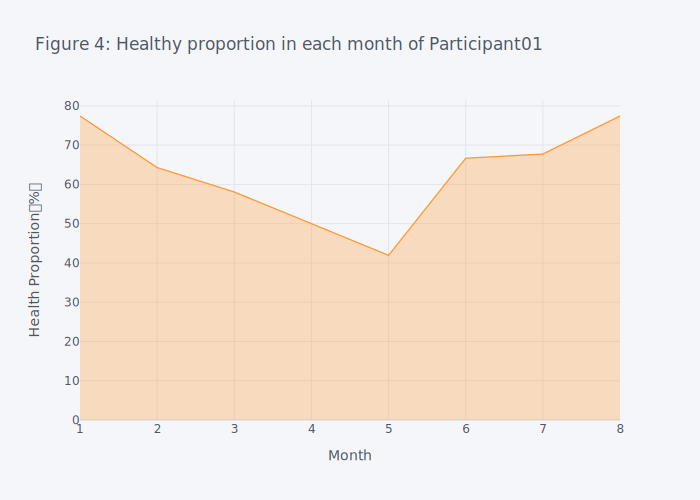

In [36]:
proportion.figure(y="health_proportion(%)",
               fill=True,
               xTitle="Month", yTitle="Health Proportion（%）", title="Figure 4: Healthy proportion in each month of Participant01"
               )

Heatmap of participant 01

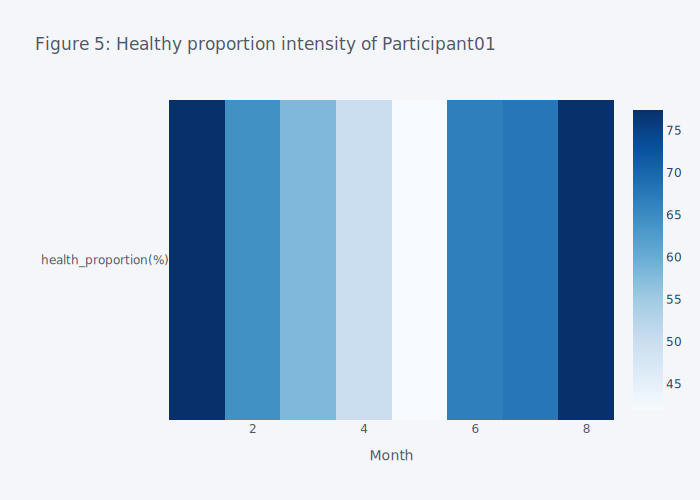

In [37]:
proportion.figure(kind="heatmap",
                   colorscale="Blues",xTitle="Month",title="Figure 5: Healthy proportion intensity of Participant01",
                   dimensions=(700,500))

Build a spread chart of total steps month to month trend

/Users/yunshuozhang/opt/anaconda3/lib/python3.9/site-packages/cufflinks/plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



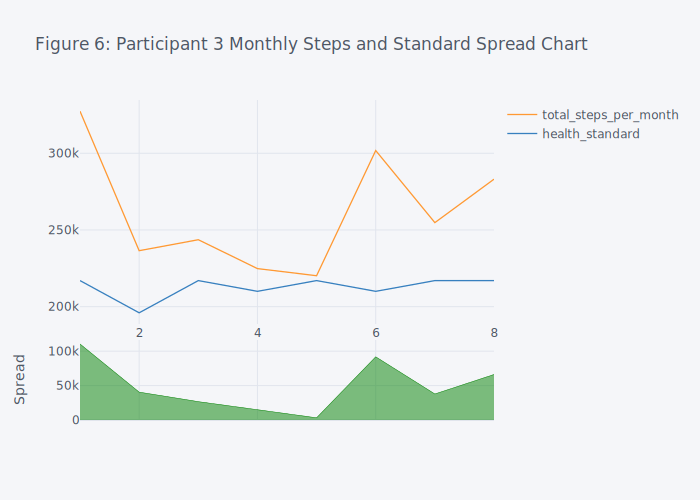

In [38]:
clean_p1.figure(kind="spread", keys=["total_steps_per_month", "health_standard"],
               title="Figure 6: Participant 3 Monthly Steps and Standard Spread Chart")

According to the figure 4 and figure 5, the proportion of days reaching the health standard in May is the lowest which is about 40%, and the color in the heat map is close to white. The percentage of healthy steps reaching the standard in January and Augest were relatively higher than others which are almost 80%, and the color in the picture is also the darker. In addition, the change of other months' proportion is relatively stable, and the value is relatively moderate which were all more than 50%. The average proportion is around 63%. Furthermore, based on the Figure 6, all the months are over the health standard. January and June exceed the standard approximately 100k steps.

Therefore, the healthy proportion of the participants in January and August is higher, and the lowest in May. The trend of the number of steps is also fluctuated but all the months reach the health standard. We suggest the participant could mainly increase the daily steps between March and May. However, compared with Participant 3, the activity level of participants is relatively high

#### 3.1.3 Other datasets: Participant_07.csv


Import the dataset and preliminary observation data

In [39]:
data07 = pd.read_csv("Participant-07.csv", sep = ",")
data07.describe()

,Steps (count)
count,6133.000000
mean,323.430904
std,560.310200
min,0.000000
25%,0.000000
50%,102.000000
75%,362.853757
max,5456.232868


In [40]:
data07.head()

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,32.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0


In [41]:
data07.tail()

,Start,Finish,Steps (count)
6128,13-Sep-2022 07:00,13-Sep-2022 08:00,798.0
6129,13-Sep-2022 08:00,13-Sep-2022 09:00,139.0
6130,13-Sep-2022 09:00,13-Sep-2022 10:00,392.0
6131,13-Sep-2022 10:00,13-Sep-2022 11:00,328.0
6132,13-Sep-2022 11:00,13-Sep-2022 12:00,0.0


According to the data07 dataset, it record the start time and finish time pf participants taking steps and the count of steps in each one hour period. The finish time range is between 01/01/2022 0:00 and 13/09/2022 12:00.

Check the null value

In [42]:
data07['month'] = pd.to_datetime(data07['Finish'], dayfirst=True).dt.month 
data07['date'] = pd.to_datetime(data07['Finish'], dayfirst=True).dt.date
data07 = data07.drop('Start', axis=1)
data07 = data07.drop('Finish', axis=1)
print(data07.isnull().sum())

Steps (count)    0
month            0
date             0
dtype: int64


Aggregate the total steps per day

In [43]:
cleaned_date_p7 = data07.groupby('date').agg(total_steps_per_day=pd.NamedAgg(column="Steps (count)", aggfunc="sum"),
                                      month=pd.NamedAgg(column="month", aggfunc="max"))

cleaned_date_p7 = cleaned_date_p7.drop(cleaned_date_p7[cleaned_date_p7.month == 9].index)
cleaned_date_p7

,total_steps_per_day,month
date,,
2022-01-01,6758.000000,1
2022-01-02,7982.000000,1
2022-01-03,7294.000000,1
2022-01-04,5918.851895,1
2022-01-05,11143.148105,1
...,...,...
2022-08-27,6133.000000,8
2022-08-28,8702.888453,8
2022-08-29,8034.911086,8


Aggregate the total steps per month and the healthy standard steps

In [44]:
clean_month_steps = cleaned_date_p7.groupby('month').agg(total_steps_per_month=pd.NamedAgg(column="total_steps_per_day", aggfunc="sum"))
clean_month_date = cleaned_date_p7.groupby('month').count()
clean_healthy = clean_month_date * 7000

In [45]:
clean_p7 = pd.concat([clean_month_steps, clean_healthy], axis=1, join="inner")
clean_p7.columns.values[1] = "health_standard"
clean_p7.round(1)

,total_steps_per_month,health_standard
month,,
1,231945.0,217000
2,226701.0,196000
3,251729.0,217000
4,226521.7,210000
5,232167.3,217000
6,221728.0,210000
7,230560.0,217000
8,261579.3,217000


Calculate the total number of the days that over 7000 steps

In [46]:
cleaned_count_p7 = cleaned_date_p7.groupby('month')['total_steps_per_day'].apply(lambda x: x[x >= 7000].count())
cleaned_count_p7 = pd.DataFrame(data = cleaned_count_p7)
cleaned_count_p7.columns.values[0] = "total_days_over_7000"
cleaned_count_p7

,total_days_over_7000
month,
1,18
2,20
3,19
4,20
5,19
6,15
7,18
8,24


Calculate the proportion

In [47]:
proportion = cleaned_count_p7['total_days_over_7000'] / clean_month_date['total_steps_per_day']
proportion = pd.DataFrame(data = proportion)
proportion.columns = proportion.columns.astype(str)
proportion.columns.values[0] = "health_proportion(%)"
proportion

,health_proportion(%)
month,
1,0.580645
2,0.714286
3,0.612903
4,0.666667
5,0.612903
6,0.500000
7,0.580645
8,0.774194


In [48]:
proportion = proportion * 100
proportion.round(2)

,health_proportion(%)
month,
1,58.06
2,71.43
3,61.29
4,66.67
5,61.29
6,50.00
7,58.06
8,77.42


Average poportion:

In [49]:
proportion['health_proportion(%)'].mean()

63.02803379416283

Proportion area chart of participant 07

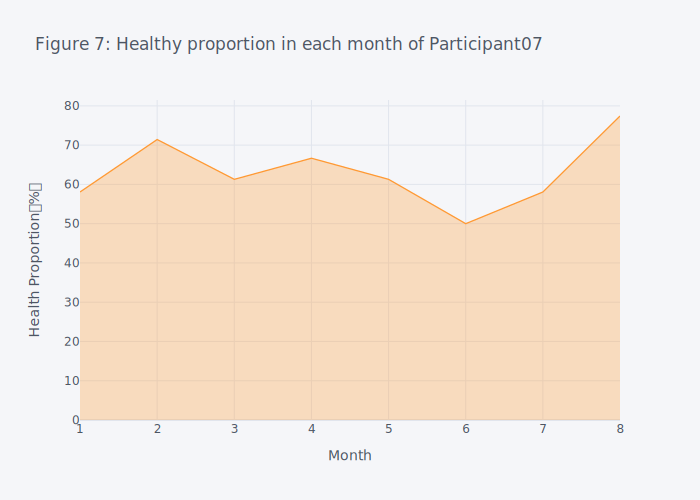

In [50]:
proportion.figure(y="health_proportion(%)",
               fill=True,
               xTitle="Month", yTitle="Health Proportion（%）", title="Figure 7: Healthy proportion in each month of Participant07"
               )

Heatmap of participant 07

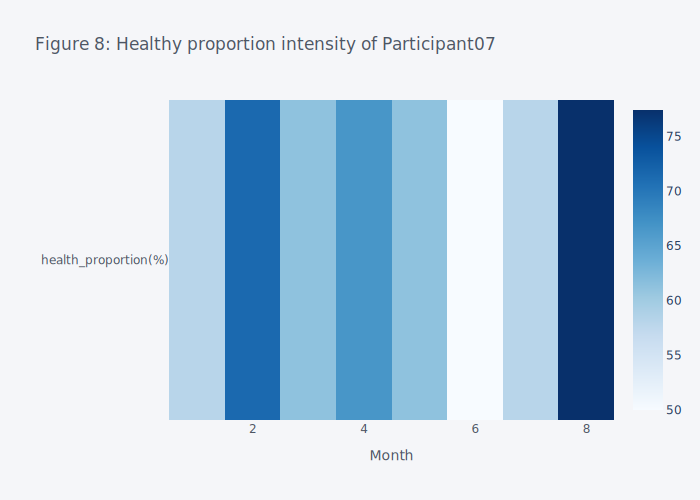

In [51]:
proportion.figure(kind="heatmap",
                   colorscale="Blues",xTitle="Month",title="Figure 8: Healthy proportion intensity of Participant07",
                   dimensions=(700,500))

Build a spread chart of total steps month to month trend

/Users/yunshuozhang/opt/anaconda3/lib/python3.9/site-packages/cufflinks/plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



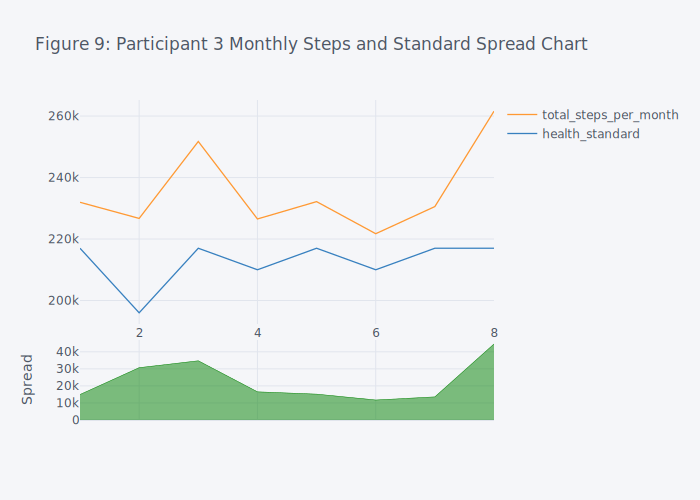

In [52]:
clean_p7.figure(kind="spread", keys=["total_steps_per_month", "health_standard"],
               title="Figure 9: Participant 3 Monthly Steps and Standard Spread Chart")

According to the figure 7 and figure 8, the proportion of days reaching the health standard in June is the lowest which is about 50%, and the color in the heat map is close to white. The percentage of healthy steps reaching the standard in February and Augest were relatively higher than others which are 71% and 77% approximately, and the color in the picture is also the darker. Also, the trend of months' proportion corresponding to health standard trend and all exceeding the health standard steps. The average proportion is also around 63%.

In conclusion, the healthy proportion of the participants in February and August is higher, and the lowest in June. The trend of the number of steps is correspond to health standard trend and proportion trend is relatively stable. We suggest the participant could mainly increase the daily steps in most of months and try to reach the healthy standard every day. However, compared with Participant 3 and Participant 1, the steps trend and proportion are relatively stable.